<a href="https://colab.research.google.com/github/ShinUkhang/AI/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%83%9D%EC%A1%B4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

타이타닉 생존데이터로 생존과 사망을 구분해보도록 하겠습니다. 

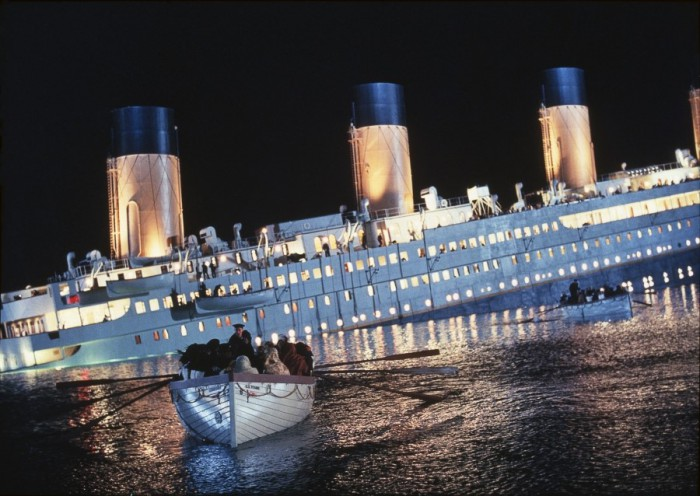

분류할 데이터를 불러옵니다.

**(# 표시는 주석으로 컴퓨터가 코드로 생각하지 않습니다.)**

In [ ]:
#구글 코랩의 files라는 모듈을 불러옵니다. 
from google.colab import files 
uploaded=files.upload()

Saving 타이타닉생존데이터.csv to 타이타닉생존데이터.csv


판다스(표,테이블을 다루는 파이썬)으로 파일을 불러옵니다.

파일이름을 정확하게 입력해야 오류가 없습니다. 

In [ ]:
import pandas as pd
data=pd.read_csv('타이타닉생존데이터.csv') #파일을 못 읽으면 encoding='cp949'을 추가해서 실행하세요. 
data=pd.DataFrame(data) 

데이터를 살펴봅시다.

PassengerID : 탑승객 고유 아이디

Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)

Pclass : 등실의 등급

Sex : 성별

Age : 나이

Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수

Parch : 함께 탐승한 부모, 자식의 수

Fare : 티켓의 요금

Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton) 



In [ ]:
data.head()

,PassengerId,Survived,Pclass,male,female,Age,SibSp,Parch,Fare,Cherbourn,Queenstown,Southampton
0,1,0,3,1,0,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,0,1,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,0,1,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,0,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,1,0,35.0,0,0,8.0500,0.0,0.0,1.0


평균, 표준편차, 최솟값,최댓값, 사분위수를 확인합니다.

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,male,female,Age,SibSp,Parch,Fare,Cherbourn,Queenstown,Southampton
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.636236,0.363764,29.642093,0.514045,0.432584,34.567251,0.182584,0.039326,0.778090
std,258.683191,0.491139,0.836854,0.481420,0.481420,14.492933,0.930692,0.854181,52.938648,0.386597,0.194506,0.415823
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000
50%,445.000000,0.000000,2.000000,1.000000,0.000000,28.000000,0.000000,0.000000,15.645850,0.000000,0.000000,1.000000
75%,677.250000,1.000000,3.000000,1.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000


데이터의 형태와 갯수를 확인합니다.
(float64는 실수라는 뜻입니다.)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   male         891 non-null    int64  
 4   female       891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cherbourn    889 non-null    float64
 10  Queenstown   889 non-null    float64
 11  Southampton  889 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 83.7 KB


데이터를 히스토그램으로 시각화했습니다.

확률과통계 시간에 배운 정규분포곡선을 나타내는 자료는 무엇인지 확인해봅시다. **(히스토그램이 나타내는 넓이는 모두 1 입니다.)**

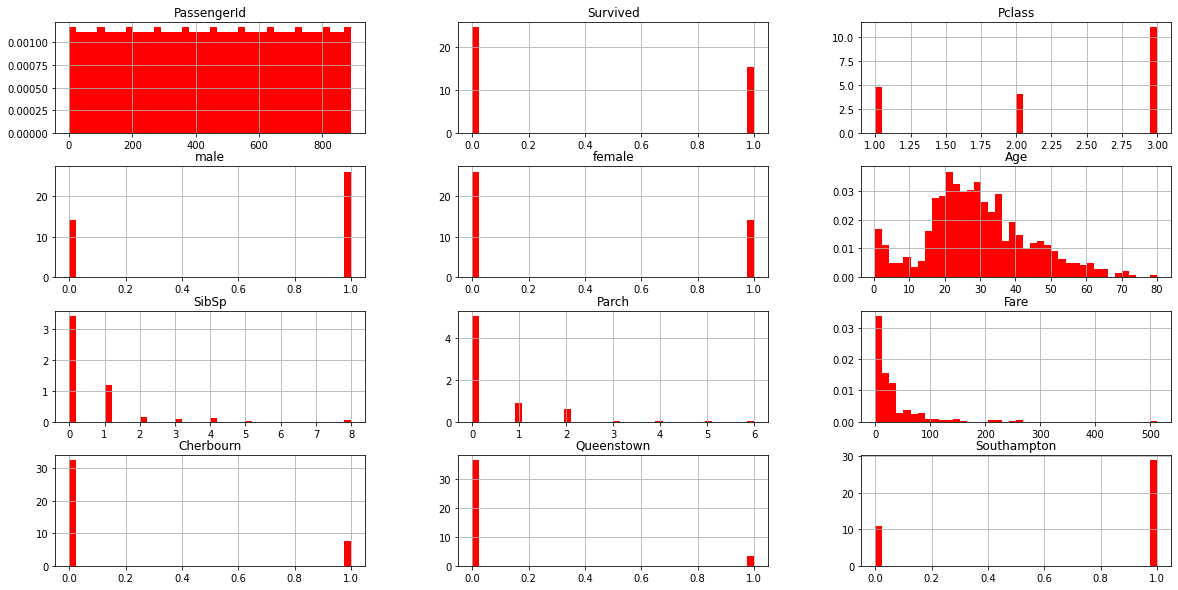

In [ ]:
#맷플롯립은 데이터를 시각화하여 표와 그래로 보여주는 모듈입니다.
#hist는 히스토그램을 의미하여 bins는 계급의 갯수, density는 상대도수, figsize는 크기, color는 색상입니다.
import matplotlib.pyplot as plt  
data.hist(bins=40, density=True, color='red',figsize=(20,10)) 
plt.show()

데이터 간의 상관계수를 확인합니다.

(결정계수도 있지만 최대한 코드를 간단하게 하고자 합니다.)

In [ ]:
corr_matrix=data.corr()# 상관계수를 확인합니다. 
corr_matrix['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
male          -0.543351
female         0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Cherbourn      0.169966
Queenstown     0.004536
Southampton   -0.151777
Name: Survived, dtype: float64

상관계수가 높은 성분을 2개 선택해보았습니다.

 'total sulfur dioxide','volatile acidity'를 x,y축으로 두고 색상은 와인분류(target)으로 두고 표현했습니다.

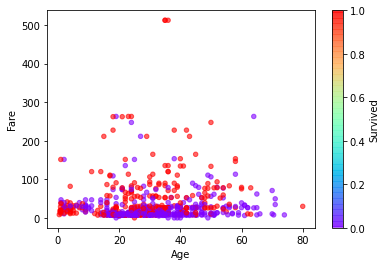

In [ ]:
#cmap은 수치에 맞게 색상을 구분하여 표현한 것입니다. 검색을 해보시면 rainbow외에 다양한 것이 있습니다. 
#alpha는 투명도인데 산점도가 겹쳐도 보이도록 합니다.
#sharex는 그래프 테두리를 사라지게 해서 예쁘게 보입니다. 필수적인 요소는 아닙니다. 
data.plot(kind='scatter', x='Age',y='Fare',cmap='rainbow',c='Survived' , alpha=0.6, sharex=False) #scatter는 산점도, c는 색상대상, cmap은 색, alpha는 투명도, sharex는 테두리 없애기
plt.show()

데이터의 결측치를 제거합니다. 

결측치는 빈칸입니다. 빈칸을 처리하는 방법은 0, 평균, 앞의수, 뒤의수 등 다양하게 채우는 방법이 있지만 , 여기서는 빈칸이 있는 행은 모두 삭제하겠습니다.

In [ ]:
data=data.dropna()

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'male', 'female', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cherbourn', 'Queenstown', 'Southampton'],
      dtype='object')

11개의 데이터를 선택해보았습니다.

In [ ]:
x=data[['PassengerId','Pclass', 'male', 'female', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cherbourn', 'Queenstown', 'Southampton']]
y=data['Survived']

데이터를 분할해보겠습니다.

전체데이터를 훈련데이터와 테스트데이터 2개로 나눕니다. 

In [ ]:
from sklearn.model_selection import train_test_split #데이터를 나누는 sklearn모듈을 불러옵니다. 
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

데이터의 행태를 확인합니다.

위에서 선택한 11개의 성분을 묶어서 벡터(1차원 텐서)가 됩니다.

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(498, 11)
(498,)
(214, 11)
(214,)


In [ ]:
#각 성분별로 최대최소을 구해줍니다. 
max=x_train.max(axis=0)
min=x_train.min(axis=0)

In [ ]:
print(max)
print(min)

PassengerId    891.0000
Pclass           3.0000
male             1.0000
female           1.0000
Age             80.0000
SibSp            5.0000
Parch            6.0000
Fare           512.3292
Cherbourn        1.0000
Queenstown       1.0000
Southampton      1.0000
dtype: float64
PassengerId    1.00
Pclass         1.00
male           0.00
female         0.00
Age            0.67
SibSp          0.00
Parch          0.00
Fare           0.00
Cherbourn      0.00
Queenstown     0.00
Southampton    0.00
dtype: float64


데이터를 모두 정규화시켜줍니다.

In [ ]:
x_train-=min
x_train/=(max-min)
x_test-=min
x_test/=(max-min)

인공신경망 모델을 만들고자 합니다. 

In [ ]:
from tensorflow import keras #인공신경망을 다루는 파이썬 모듈
from tensorflow.keras.models import Sequential #인공신경망 시작한다는 뜻
from tensorflow.keras.layers import Dense # 인공신경망의 층을 넣는다는 뜻

model = Sequential()
model.add(Dense(20, input_dim=11,activation='relu')) # 성분이 11개이므로 노드 11개짜리 입력층 추가, relu는 활성화 함수
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='softmax')) #출력층(생존 사망이라서 2개)
opt=keras.optimizers.SGD(learning_rate=0.005) #확률적 경사하강법, 학습률 확인
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc']) #나중에 결과가 2개인 확률변수

모델을 실행합니다. 
epoch는 반복횟수이고, batch_size는 훈련데이터 단위입니다.

예를 들면 100개의 데이터에서 epoch=5, batch_size=10이면
100개를 10개씩 묶어주고 묶음마다 1개만 훈련합니다.
이러한 방법으로 5회 반복합니다.

그리고 시간을 확인하면서 배치사이즈와 에포크에 따라 비교합시다. 

In [ ]:
import time
a=time.time()
hist = model.fit(x_train, y_train, shuffle=True, epochs=5, batch_size=1)
b=time.time()
print(b-a)

Epoch 1/5
498/498 [==============================] - 1s 2ms/step - loss: 0.5596 - acc: 0.7369
Epoch 2/5
498/498 [==============================] - 1s 2ms/step - loss: 0.4801 - acc: 0.7972
Epoch 3/5
498/498 [==============================] - 1s 2ms/step - loss: 0.4557 - acc: 0.7992
Epoch 4/5
498/498 [==============================] - 1s 2ms/step - loss: 0.4437 - acc: 0.8112
Epoch 5/5
498/498 [==============================] - 1s 2ms/step - loss: 0.4312 - acc: 0.8012
5.553661346435547


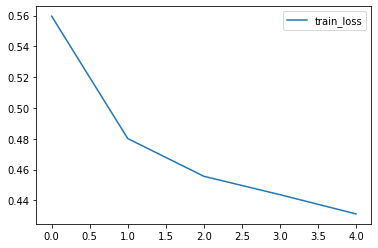

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train_loss')
plt.legend()
plt.show()

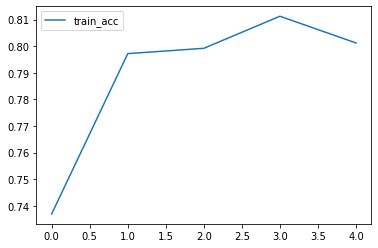

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'],  label='train_acc')
plt.legend()
plt.show()

**생존분류** 예측하기 

In [ ]:
y_pred=model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np
y_pred=np.argmax(model.predict(x_test), axis=-1)
print(y_pred)

7/7 [==============================] - 0s 2ms/step
[1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


확률과통계시간에 배운 조건부확률을 확인할 수 있습니다. 

우리가 사용한 정확도(acc)는 전체에서 정확하게 분류한 비율입니다.

$$정확도(acc)={정확한 생존자+정확한 사망자\over{전체 인원}}$$

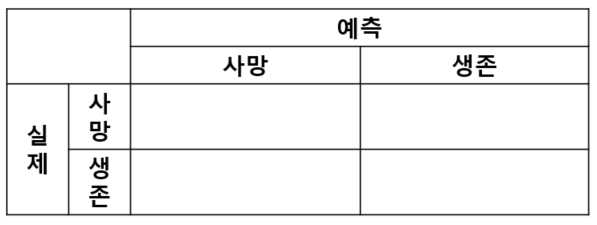

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)


array([[116,  43],
       [  6,  49]])